In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import pulse2percept as p2p

2017-03-31 11:54:15,424 [pulse2percept] [INFO] Welcome to pulse2percept


In [2]:
implant = p2p.implants.ElectrodeArray('epiretinal', 260, 0, 0, hs=100)

In [3]:
sim = p2p.Simulation(implant)

In [4]:
sim.set_optic_fiber_layer(sampling=100, x_range=[-1000, 1000], y_range=[-1000, 1000])

2017-03-31 11:54:15,588 [pulse2percept.retina] [INFO] File './retina_s100_l2.0_rot0.0_2000x2000.npz' doesn't exist or has outdated parameter values, generating...


In [5]:
tsample = 5e-6
sim.set_ganglion_cell_layer(tsample=tsample)

In [6]:
def get_pulse_train(freq, amp, tsample):
    return p2p.stimuli.PulseTrain(tsample, freq=freq, amp=amp,
                                  pulse_dur=0.45 / 1000, interphase_dur=0.45 / 1000,
                                  delay=0, pulsetype='cathodicfirst')

In [7]:
curr_thresh = 22.0
pulse_train = get_pulse_train(20, 1.25 * curr_thresh, tsample)
t = np.arange(pulse_train.data.size) * tsample

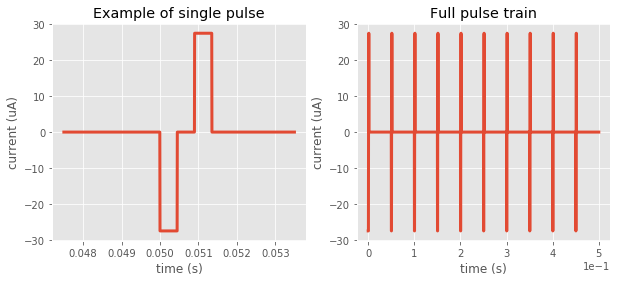

In [8]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.plot(t[9500:10700], pulse_train.data[9500:10700], linewidth=3)
plt.xlabel('time (s)')
plt.ylabel('current (uA)')
plt.title('Example of single pulse')

plt.subplot(122)
plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
plt.plot(t, pulse_train.data, linewidth=3)
plt.xlabel('time (s)')
plt.ylabel('current (uA)')
plt.title('Full pulse train')

In [9]:
# Nanduri 2012 data

# input amplitude values (x threshold) and expected output (brightness)
all_amps = np.array([1.25, 1.5, 2, 4, 6]) * curr_thresh
out_amps = np.array([10, 15, 18, 19, 19])

# input frequency values and expected output
all_freqs = np.array([13, 20, 27, 40, 80, 120])
out_freqs = np.array([7.3, 10, 13, 19, 34, 51])

2017-03-31 11:54:18,431 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 11:54:18,550 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 11:54:45,749 [pulse2percept.api] [INFO] Done.
2017-03-31 11:54:45,861 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 11:54:45,984 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 11:55:13,130 [pulse2percept.api] [INFO] Done.
2017-03-31 11:55:13,226 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 11:55:13,340 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 11:55:40,471 [pulse2percept.api] [INFO] Done.
2017-03-31 11:55:40,568 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 11:55:40,686 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 11:56:08,002 [pulse2percept.api] [INFO] Done.
2017-03-31 11:56:08,122 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 11:56:08,242 [pulse2percept.api] [INFO] tol=5.0%, 44

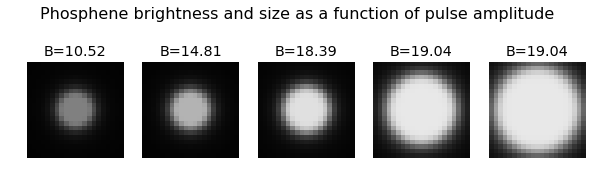

In [10]:
# Run the model on different amplitude values.
# We use current spread instead of effective current spread (use_ecs=False) in order to simulate the
# Nanduri conditions.
plt.figure(figsize=(10, 3))
plt.suptitle('Phosphene brightness and size as a function of pulse '
             'amplitude',
             fontsize=16)
bright_amp = []
for i, ampl in enumerate(all_amps):
    stim = get_pulse_train(20, ampl, tsample)
    resp = sim.pulse2percept(stim, layers=['GCL'])
    bright_amp.append(resp.data.max())
    
    plt.subplot(1, len(all_amps), i + 1)
    frame = p2p.get_brightest_frame(resp)
    plt.imshow(frame.data, cmap='gray', vmin=0, vmax=21)
    plt.axis('off')
    plt.title("B={:.2f}".format(frame.data.max()))
plt.savefig('size-amps.png')

bright_amp = np.array(bright_amp)

2017-03-31 11:57:06,806 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 11:57:07,012 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 11:57:34,234 [pulse2percept.api] [INFO] Done.
2017-03-31 11:57:34,346 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 11:57:34,462 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 11:58:01,624 [pulse2percept.api] [INFO] Done.
2017-03-31 11:58:01,721 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 11:58:01,834 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 11:58:29,053 [pulse2percept.api] [INFO] Done.
2017-03-31 11:58:29,171 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 11:58:29,285 [pulse2percept.api] [INFO] tol=5.0%, 441/441 px selected
2017-03-31 11:58:56,511 [pulse2percept.api] [INFO] Done.
2017-03-31 11:58:56,643 [pulse2percept.api] [INFO] Starting pulse2percept...
2017-03-31 11:58:56,763 [pulse2percept.api] [INFO] tol=5.0%, 44

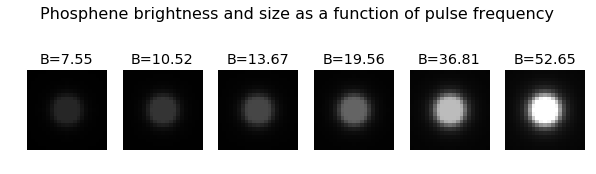

In [12]:
# Run the model on different frequency values
plt.figure(figsize=(10, 3))
plt.suptitle('Phosphene brightness and size as a function of pulse '
             'frequency',
             fontsize=16)
bright_freq = []
for i, freq in enumerate(all_freqs):
    stim = get_pulse_train(freq, 1.25 * curr_thresh, tsample)
    resp = sim.pulse2percept(stim, layers=['GCL'])
    bright_freq.append(resp.data.max())
    plt.subplot(1, len(all_freqs), i + 1)

    frame = p2p.get_brightest_frame(resp)
    plt.imshow(frame.data, cmap='gray', vmin=0, vmax=50)
    plt.axis('off')
    plt.title("B={:.2f}".format(frame.data.max()))
plt.savefig('size-freqs.png')

bright_freq = np.array(bright_freq)

(0, 150)

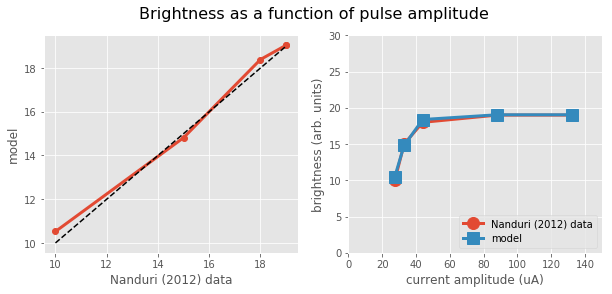

In [13]:
plt.figure(figsize=(10, 4))
plt.suptitle('Brightness as a function of pulse amplitude', fontsize=16)

plt.subplot(121)
plt.plot(out_amps, bright_amp, 'o-', linewidth=3)
plt.plot([out_amps[0], out_amps[-1]], [out_amps[0], out_amps[-1]], '--k')
plt.xlabel('Nanduri (2012) data')
plt.ylabel('model')

plt.subplot(122)
plt.plot(all_amps, out_amps, '-o', linewidth=3, markersize=12,
         label='Nanduri (2012) data')
plt.plot(all_amps, bright_amp, '-s', linewidth=3, markersize=12,
         label='model')
plt.xlabel('current amplitude (uA)')
plt.ylabel('brightness (arb. units)')
plt.legend(loc='lower right')
plt.ylim(0, 30)
plt.xlim(0, 150)

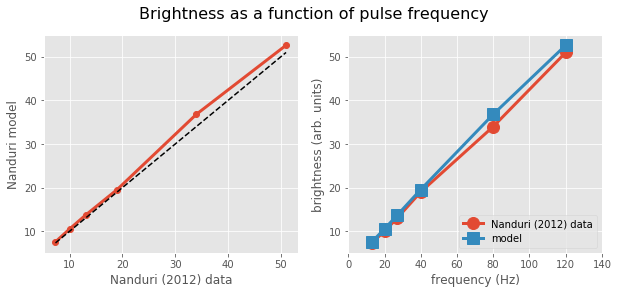

In [14]:
plt.figure(figsize=(10, 4))
plt.suptitle('Brightness as a function of pulse frequency', fontsize=16)

plt.subplot(121)
plt.plot(out_freqs, bright_freq, 'o-', linewidth=3)
plt.plot([out_freqs[0], out_freqs[-1]], [out_freqs[0], out_freqs[-1]],
         '--k')
plt.xlabel('Nanduri (2012) data')
plt.ylabel('Nanduri model')

plt.subplot(122)
plt.plot(all_freqs, out_freqs, '-o', linewidth=3, markersize=12,
         label='Nanduri (2012) data')
plt.plot(all_freqs, bright_freq, '-s', linewidth=3, markersize=12,
         label='model')
plt.xlabel('frequency (Hz)')
plt.ylabel('brightness (arb. units)')
plt.legend(loc='lower right')
plt.xlim(0, 140)
plt.savefig('nanduri-freqs.png')